In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Loading the dataset
url = "https://raw.githubusercontent.com/Sourajyoti1234/FIFA21_required_csv_files/main/players_21.csv"
df = pd.read_csv(url, usecols=['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'])

### 📊 EDA

Q1: How is player age distributed in the dataset?

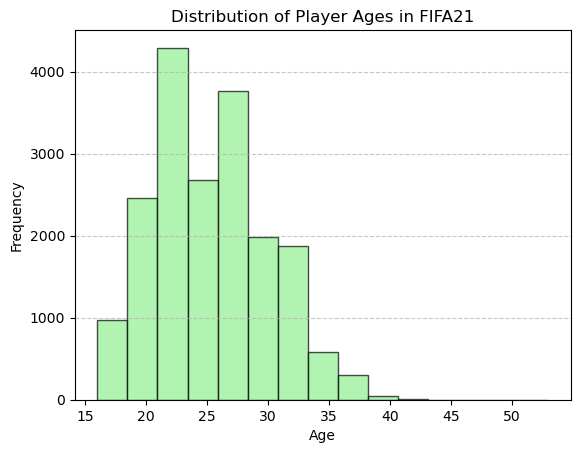

In [30]:
#Distribution of players age in FIFA21
plt.hist(df.age, bins=15, color='lightgreen', edgecolor='black',alpha=0.7)
plt.title('Distribution of Player Ages in FIFA21')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

Most players are in their early 20s, followed by players in their mid 20s.
More youngsters (+15 years of age) than very old players (35 years of age).

*Implications: 
As shown later in 6.4, young players have the highest potantial rating and room for improvement. While older players may have a higher overall rating,
they are not expected to experience a high performance increase over the next years. 
From a economic standpoint of a club, it's attractive to have young players with the potential to see significant performance increases.*

Q2: How does player height vary by nationality?

In [25]:
#Variance of player size depending on country of origin
df.groupby(by='nationality').height_cm.agg('mean').sort_values(ascending=False).head(10)

nationality
Saint Kitts and Nevis       189.000000
Lithuania                   188.400000
Central African Republic    188.000000
Lebanon                     187.666667
Chad                        186.000000
Serbia                      185.707692
Moldova                     185.583333
Iceland                     185.574074
Croatia                     185.545455
Bosnia Herzegovina          184.893939
Name: height_cm, dtype: float64

/var/folders/0q/s7fj151s553_0czdxm4mtj680000gn/T/ipykernel_28938/519811197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_heights.values, y=avg_heights.index, palette='Blues_r')


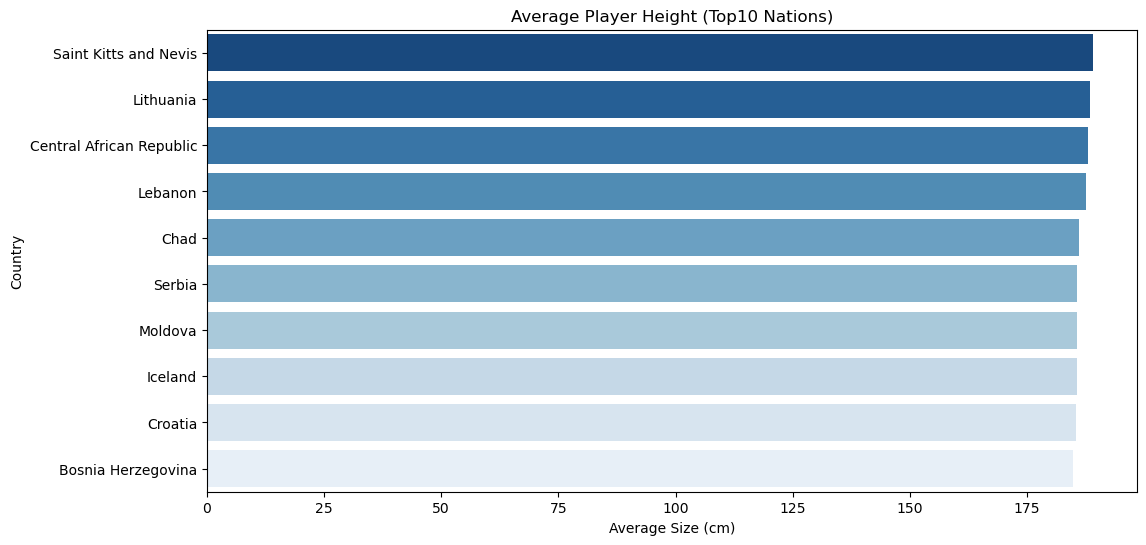

In [34]:
#Visualizing with bar plot for avg heights
avg_heights = df.groupby(by='nationality').height_cm.agg('mean').sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_heights.values, y=avg_heights.index, palette='Blues_r')
plt.title('Average Player Height (Top10 Nations)')
plt.xlabel('Average Size (cm)')
plt.ylabel('Country')
plt.show()


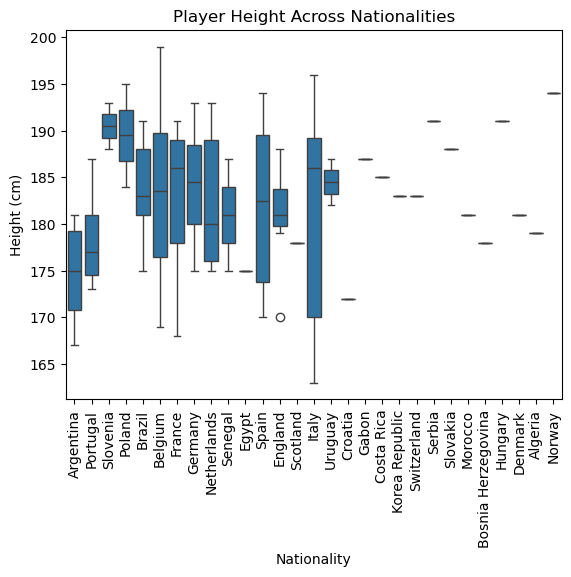

In [79]:
sns.boxplot(x='nationality', y='height_cm', data=df.head(100))
plt.title('Player Height Across Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Height (cm)')
plt.xticks(rotation=90)
plt.show()

Tall players have a high likelihood of being a good header, both defensively and offensively.
Clubs want to make sure to have tall players in crucial field positions such as center back or striker. 

Q3: What is the distribution of player weights?

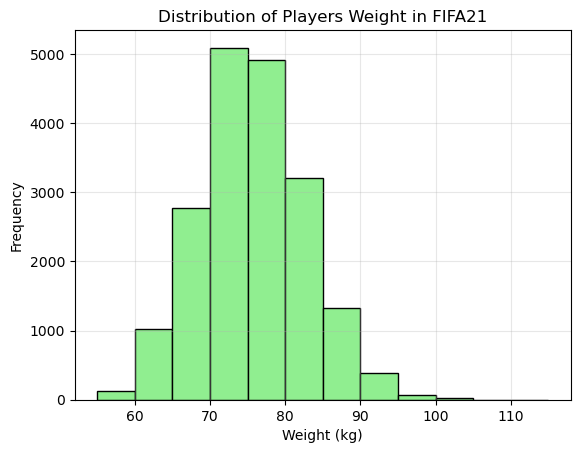

In [37]:
#Distribution of player weights in FIFA21
plt.hist(df.weight_kg, bins=range(55,120,5), color='lightgreen', edgecolor='black')
plt.title('Distribution of Players Weight in FIFA21')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

The average player in FIFA21 has a weight between 70 and 75 kgs.

Q4: How does overall rating vary by age?

In [51]:
#Overall rating vs age
df.groupby(by='age').overall.agg('mean','min','max').sort_values(ascending=False).head(30)

age
42    71.200000
33    69.714286
32    69.482484
34    69.339833
31    69.113281
35    69.045872
36    68.925000
28    68.889325
30    68.775401
29    68.721531
37    68.419753
27    68.349219
39    68.142857
26    67.783868
38    67.385965
25    67.202400
24    67.002811
40    66.307692
23    65.272912
41    64.714286
22    64.268990
43    64.000000
21    62.389009
20    61.233357
53    59.000000
19    58.293605
18    57.017964
17    56.164835
16    54.827586
Name: overall, dtype: float64

Text(0, 0.5, 'Age in Years')

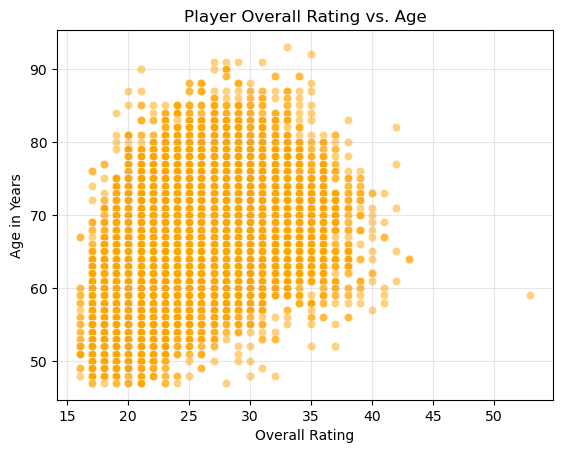

In [77]:
#Visualizing with scatterplot
sns.scatterplot(x='age',y='overall',data=df, alpha=0.5, color='orange')
plt.grid(True, alpha=0.3)
plt.title('Player Overall Rating vs. Age')
plt.xlabel('Overall Rating')
plt.ylabel('Age in Years')

Data shows a relationship between age and overall rating in FIFA21.
The rating tends to increase with players age. 

Q5: How are player market values distributed?

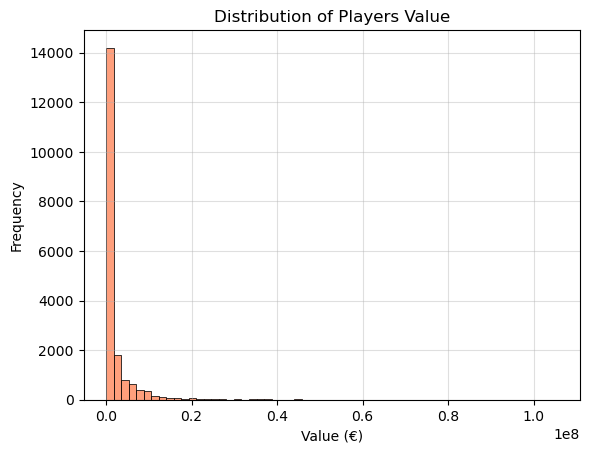

In [93]:
#Distribution of value_eur
sns.histplot(df['value_eur'], bins=60, color='coral')
plt.title('Distribution of Players Value')
plt.xlabel('Value (€)')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.4)
plt.show()

Q6: Does the preferred foot influence the overall rating?

In [95]:
#Relationship between preferred foot and overall rating
df.groupby(by='preferred_foot').overall.agg('mean')

preferred_foot
Left     66.337189
Right    65.472591
Name: overall, dtype: float64

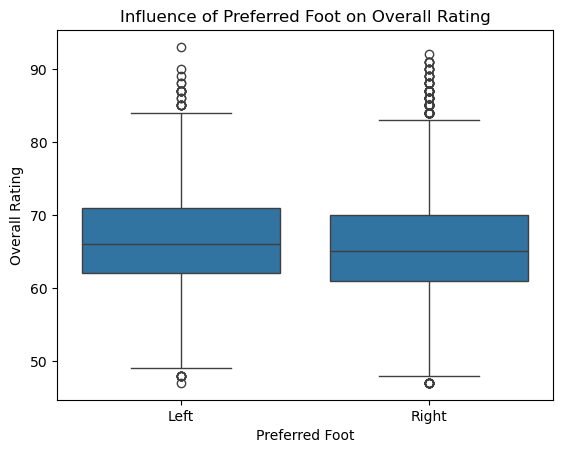

In [89]:
sns.boxplot(x='preferred_foot', y='overall', data=df)
plt.title('Influence of Preferred Foot on Overall Rating')
plt.xlabel('Preferred Foot')
plt.ylabel('Overall Rating')
plt.show()

Left footed players are slightly higher rated compared to right footed players.

Q7: How are player positions distributed?

In [103]:
#Distribution of player positions
position_count = df['player_positions'].value_counts()
position_count

player_positions
CB             2437
GK             2083
ST             1893
CDM, CM         827
CM              810
               ... 
CDM, LM, CM       1
RM, RWB, ST       1
RB, LB, CM        1
CB, CAM           1
LW, LWB           1
Name: count, Length: 611, dtype: int64

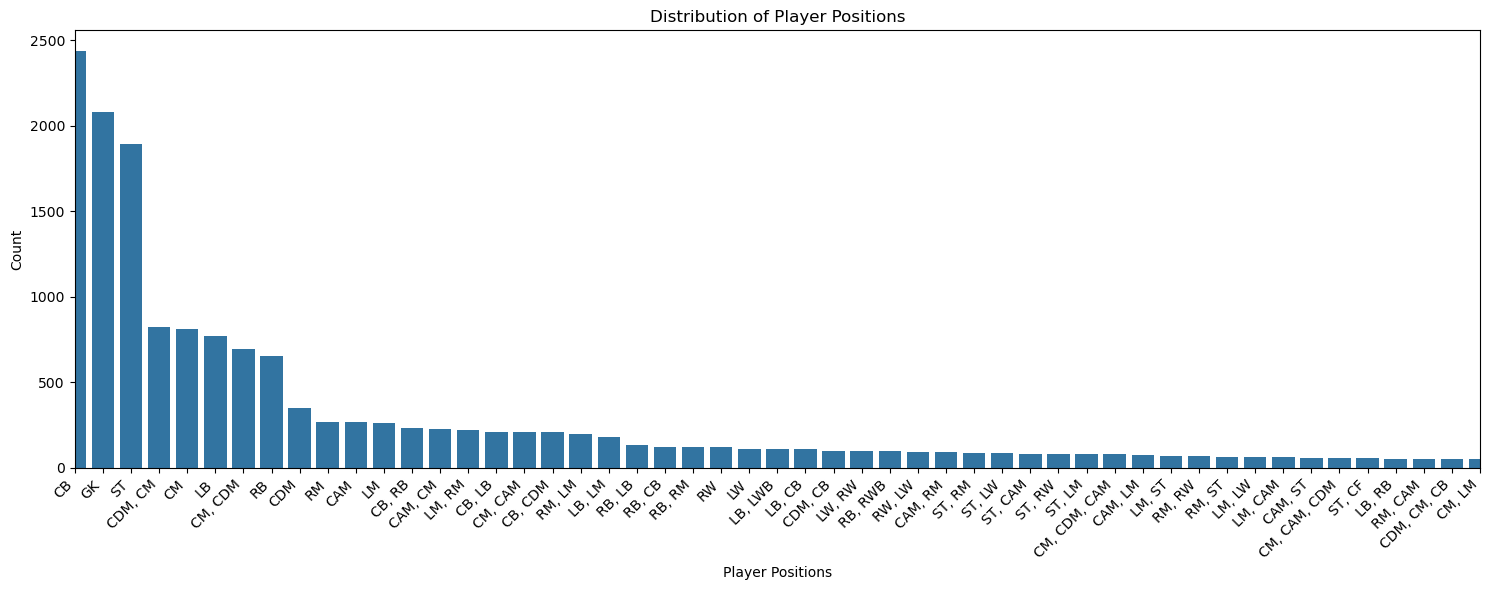

In [109]:
#Visualizing with seaborn
plt.figure(figsize=(15, 6))
sns.countplot(x='player_positions', data=df, order=df['player_positions'].value_counts().index)
plt.title('Distribution of Player Positions')
plt.xlabel('Player Positions')
plt.ylabel('Count')
plt.xlim(0,50)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q8: How does international reputation correlate with overall rating?

In [133]:
#Korrelation between int. reputation and overall rating
df.groupby(by='international_reputation').overall.agg('mean').sort_values(ascending=False)

international_reputation
5    89.166667
4    84.302326
3    80.536842
2    75.244838
1    64.830501
Name: overall, dtype: float64

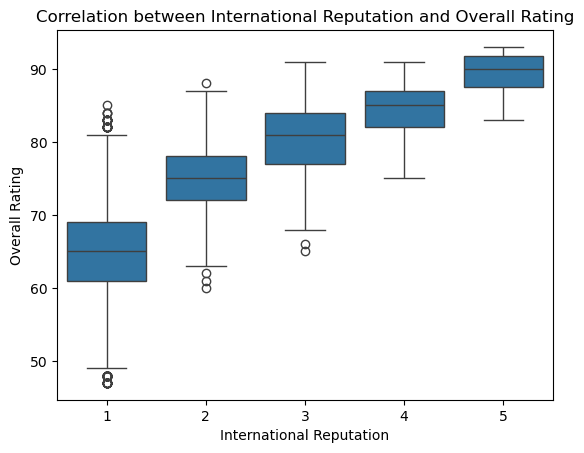

In [112]:
sns.boxplot(x='international_reputation', y='overall', data=df)
plt.title('Correlation between International Reputation and Overall Rating')
plt.xlabel('International Reputation')
plt.ylabel('Overall Rating')
plt.show()

We see a significant correlation between int. reputation and the overall rating.
The higher the reputation, the higher the average rating. 

Q9: What is the distribution of weak foot ratings?

In [151]:
#Rating distribution for week foot scores
week_foot_df = df['weak_foot'].value_counts()
week_foot_df

weak_foot
3    11661
2     4176
4     2699
5      273
1      135
Name: count, dtype: int64

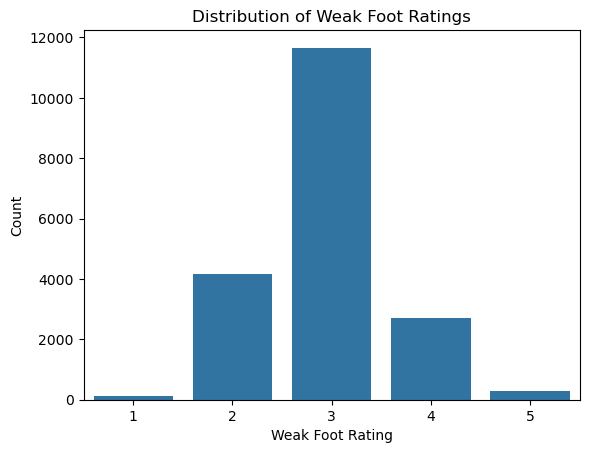

In [117]:
sns.countplot(x='weak_foot', data=df)
plt.title('Distribution of Weak Foot Ratings')
plt.xlabel('Weak Foot Rating')
plt.ylabel('Count')
plt.show()

The majority of players has a rating of 3 for the week foot.
Only 273 seem to have outstanding week foot ratings of 5.

Q10: How does skill moves rating influence market value?

In [167]:
#Relationship between skill moves and player value
df.groupby(by='skill_moves').value_eur.agg('mean').round(2)

skill_moves
1     1661563.34
2     1103254.32
3     2733170.64
4     8458271.11
5    21820909.09
Name: value_eur, dtype: float64

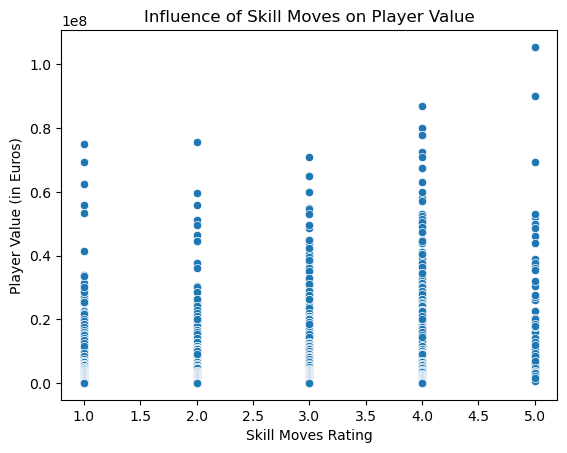

In [120]:
sns.scatterplot(x='skill_moves', y='value_eur', data=df)
plt.title('Influence of Skill Moves on Player Value')
plt.xlabel('Skill Moves Rating')
plt.ylabel('Player Value (in Euros)')
plt.show()

As expected, a clear correlation between skill moves and the players value can be observed here.
The higher the skills, the higher the market value another club has to pay in order to attract and sign that player.

Q11: What is the distribution of work rates among players?

In [173]:
#Distribution of players' work rate
df['work_rate'].value_counts()

work_rate
Medium/Medium    9980
High/Medium      3455
Medium/High      1798
High/High        1031
Medium/Low        913
High/Low          786
Low/Medium        482
Low/High          446
Low/Low            53
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

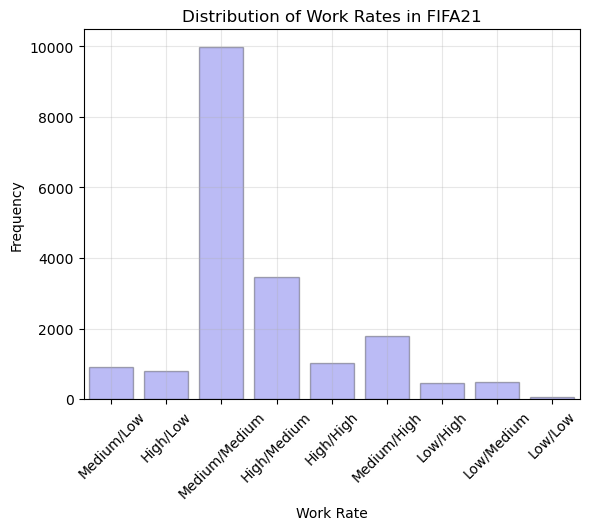

In [195]:
#Visualizing via barchart
sns.countplot(x='work_rate', data=df, color='blue', alpha=0.3, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Distribution of Work Rates in FIFA21')
plt.xlabel('Work Rate')
plt.grid(True, alpha=0.3)
plt.ylabel('Frequency')

Q12: How does body type distribution vary by position?

In [209]:
#Variance of body type per field position
body_type_position_counts = df.groupby(['player_positions', 'body_type']).size()
body_type_position_counts

player_positions  body_type
CAM               Lean         122
                  Normal       134
                  Stocky        12
CAM, CDM          Lean           8
                  Normal         5
                              ... 
ST, RW, RM        Lean           2
                  Normal         2
                  Stocky         1
ST, RWB           Lean           1
                  Stocky         1
Length: 1239, dtype: int64

Q13: How does the distribution of so called "real face" players differ from others?

In [229]:
#Distribution of real faces
df['real_face'].value_counts()

real_face
No     16746
Yes     2198
Name: count, dtype: int64

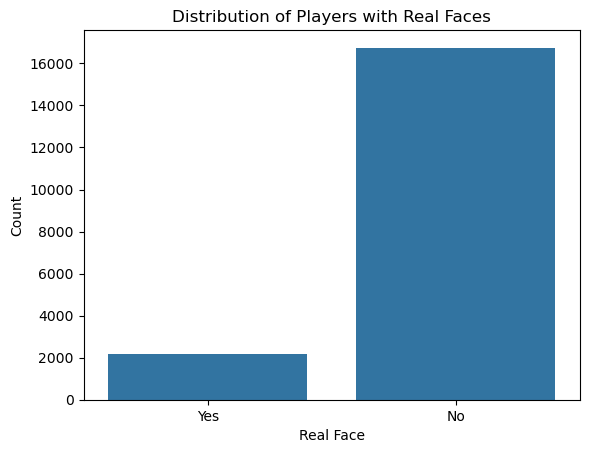

In [131]:
sns.countplot(x='real_face', data=df)
plt.title('Distribution of Players with Real Faces')
plt.xlabel('Real Face')
plt.ylabel('Count')
plt.show()

In [235]:
#Grouping with position and real_face
real_face_position_counts = df.groupby(['player_positions','real_face']).size().reset_index(name='count')
real_face_position_counts

,player_positions,real_face,count
0,CAM,No,249
1,CAM,Yes,19
2,"CAM, CDM",No,12
3,"CAM, CDM",Yes,1
4,"CAM, CDM, CM",No,4
...,...,...,...
851,"ST, RW, LW",No,41
852,"ST, RW, LW",Yes,2
853,"ST, RW, RM",No,3
854,"ST, RW, RM",Yes,2


In [245]:
#Grouping with league and real_face
real_face_df = df[df['real_face'] == 'Yes']
real_face_league_counts = real_face_df.groupby('league_name').size().reset_index(name='count')
real_face_league_counts = real_face_league_counts.sort_values(by='count', ascending=False)
real_face_league_counts.head(10)

,league_name,count
12,English Premier League,489
35,Spain Primera Division,256
15,German 1. Bundesliga,244
9,English League Championship,200
40,USA Major League Soccer,199
20,Italian Serie A,130
13,French Ligue 1,93
36,Spanish Segunda División,69
25,Mexican Liga MX,54
29,Portuguese Liga ZON SAGRES,50


Probably due to a high expense, only 2198 players have a real face in the game. 
To no surprise, the top tier leagues like English Premier League, Spain Primera Division and the German Bundesliga have the most real faces in the game.
Those leagues have the highest marketing presence, hence EA Sports as the game developer has a high interest in delivering a great gaming experience to its players.

Q14: What is the relationship between dribbling ability and overall rating?

In [255]:
#Correlation between dribbling and overall rating
df.groupby(by='overall').dribbling.agg('mean').sort_values(ascending=False).head(20)

overall
93    95.000000
92    89.000000
91    89.000000
90    85.500000
88    83.500000
87    82.352941
83    80.206349
85    79.911765
89    79.750000
84    79.722222
86    79.333333
82    77.930233
81    77.573171
80    76.276423
79    75.429448
78    73.797980
77    73.590551
76    71.955326
75    71.281314
74    70.558824
Name: dribbling, dtype: float64

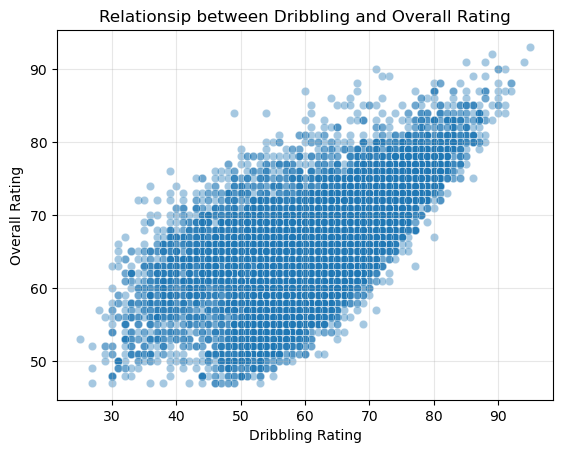

In [140]:
#Visualizing with scatterplot
sns.scatterplot(x='dribbling', y='overall',data=df, alpha=0.4)
plt.title('Relationsip between Dribbling and Overall Rating')
plt.xlabel('Dribbling Rating')
plt.ylabel('Overall Rating')
plt.grid(True, alpha=0.3)
plt.show()

There is a strong correlation between dribbling and the overall rating. 
The higher the dribbling skills, the higher the rating.

Q15: How do player wages vary between leagues?

In [271]:
#Distribution of wages across leagues
df.groupby(by='league_name').wage_eur.agg('mean').sort_values(ascending=False).head(15)

league_name
English Premier League           52149.082569
Spain Primera Division           31985.503876
Italian Serie A                  27602.945736
German 1. Bundesliga             24073.996350
French Ligue 1                   19445.583333
Turkish Süper Lig                12091.426146
Mexican Liga MX                  11074.361493
English League Championship       9866.361072
Campeonato Brasileiro Série A     9341.666667
Saudi Abdul L. Jameel League      8580.459770
Argentina Primera División        6421.547800
Belgian Jupiler Pro League        6365.650407
Scottish Premiership              6181.818182
Portuguese Liga ZON SAGRES        5776.568627
German 2. Bundesliga              5720.611440
Name: wage_eur, dtype: float64

/var/folders/0q/s7fj151s553_0czdxm4mtj680000gn/T/ipykernel_28938/4081281385.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top15_wage_df.values, y=top15_wage_df.index, palette='coolwarm')


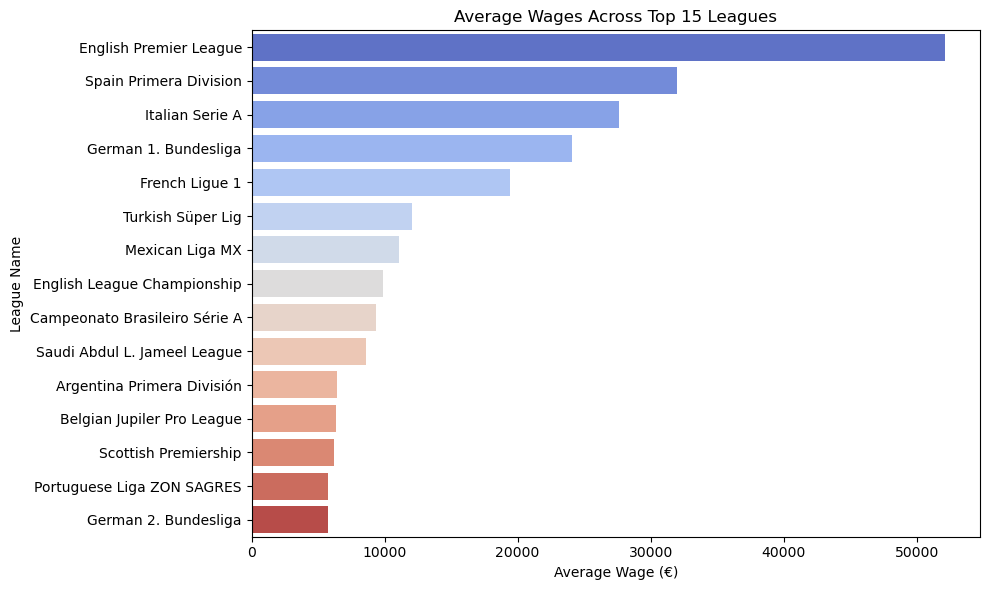

In [142]:
#Visualizing
top15_wage_df = df.groupby(by='league_name').wage_eur.agg('mean').sort_values(ascending=False).head(15)

#Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top15_wage_df.values, y=top15_wage_df.index, palette='coolwarm')
plt.title('Average Wages Across Top 15 Leagues')
plt.xlabel('Average Wage (€)')
plt.ylabel('League Name')
plt.tight_layout()
plt.show()

As expected, the biggest leagues in England, Spain, italy and Germany have the highest average player wages. 
England's Premier League is by far number 1 with wages more than twice as high as Germany. 
There is one second division league in the Top15, which is the 2nd Bundesliga in Germany. 
Noteworthy is the pretty high rank of the Saudi League, making the Top10 already in 2021. 